In [1]:
import plotly.express as px
import pandas as pd

color_discrete_map = {'CellProfiler': 'rgb(0,114,178)',
                      'DeepProfiler': 'rgb(213,94,0)'}

Code for generating figures in the paper. The data tables were generated by `1.calculate-map.ipynb` and `2.calculate-map-dl.ipynb`.

In [2]:
cp_replicability_df = (
    pd.read_csv('output/cellprofiler_replicability_ap.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="CellProfiler")
)

dp_replicability_df = (
    pd.read_csv('output/deepprofiler_replicability_ap.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="DeepProfiler")
)

replicability_df = pd.concat([cp_replicability_df, dp_replicability_df], ignore_index=True, join="inner")

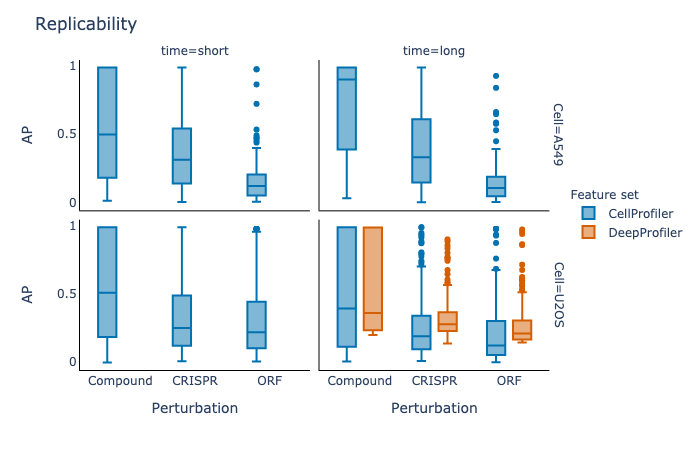

In [3]:
fig = px.box(data_frame=replicability_df,
             x='Modality',
             y='ap',
             color='feature_set',
             boxmode='group',
             facet_row='Cell',
             facet_col='time',
             color_discrete_map=color_discrete_map)
fig.update_layout(title='Replicability',
                  xaxis1=dict(title='Perturbation', linecolor = "#000000"),
                  xaxis2=dict(title='Perturbation', linecolor = "#000000"),
                  xaxis3=dict(linecolor = "#000000"),
                  xaxis4=dict(linecolor = "#000000"),
                  yaxis1=dict(title='AP', linecolor = "#000000"),
                  yaxis2=dict(linecolor = "#000000"),
                  yaxis3=dict(title='AP', linecolor = "#000000"),
                  yaxis4=dict(linecolor = "#000000"),
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(y=0.5,
                              title="Feature set",
                              bgcolor='rgba(0,0,0,0)'))
fig.show("png")
fig.write_image(f'figures/3.replicability_ap.png', width=640, height=480, scale=2)

In [4]:
cp_matching_df = (
    pd.read_csv('output/cellprofiler_matching_ap.csv')
    .assign(Cell_timepoint=lambda x: x.Cell+'_'+x.time)
    .assign(feature_set="CellProfiler")
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
)

dp_matching_df = (
    pd.read_csv('output/deepprofiler_matching_ap.csv')
    .assign(Cell_timepoint=lambda x: x.Cell+'_'+x.time)
    .assign(feature_set="DeepProfiler")
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
)

matching_df = pd.concat([cp_matching_df, dp_matching_df], ignore_index=True, join="inner")

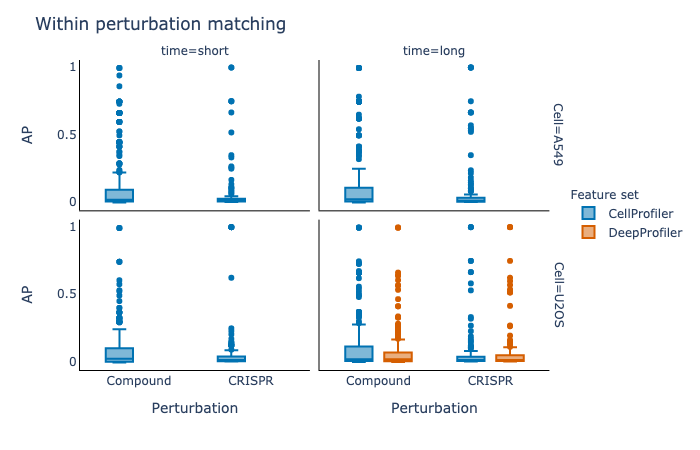

In [5]:
fig = px.box(data_frame=matching_df,
             x='Modality',
             y='ap',
             color='feature_set',
             boxmode='group',
             facet_row='Cell',
             facet_col='time',
             color_discrete_map=color_discrete_map)
fig.update_layout(title='Within perturbation matching',
                  xaxis1=dict(title='Perturbation', linecolor = "#000000"),
                  xaxis2=dict(title='Perturbation', linecolor = "#000000"),
                  xaxis3=dict(linecolor = "#000000"),
                  xaxis4=dict(linecolor = "#000000"),
                  yaxis1=dict(title='AP', linecolor = "#000000"),
                  yaxis2=dict(linecolor = "#000000"),
                  yaxis3=dict(title='AP', linecolor = "#000000"),
                  yaxis4=dict(linecolor = "#000000"),
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(y=0.5,
                              title="Feature set",
                              bgcolor='rgba(0,0,0,0)'))
fig.show("png")
fig.write_image(f'figures/3.matching_ap.png', width=640, height=480, scale=2)

In [6]:
cp_gene_compound_df = (
    pd.read_csv('output/cellprofiler_gene_compound_matching_ap.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="CellProfiler")
)

dp_gene_compound_df = (
    pd.read_csv('output/deepprofiler_gene_compound_matching_ap.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="DeepProfiler")
)

gene_compound_df = pd.concat([cp_gene_compound_df, dp_gene_compound_df], ignore_index=True, join="inner")

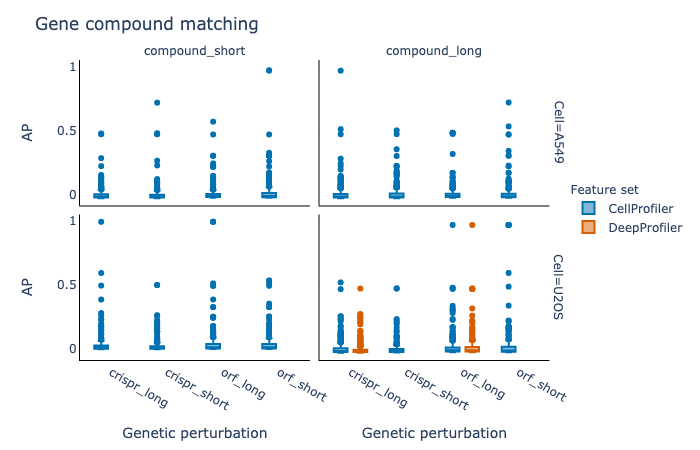

In [7]:
fig = px.box(data_frame=gene_compound_df,
             x='Modality2',
             y='ap',
             color='feature_set',
             boxmode='group',
             facet_col='Modality1',
             facet_row='Cell',
             color_discrete_map=color_discrete_map)
fig.update_layout(title='Gene compound matching',
                  xaxis1=dict(title='Genetic perturbation', linecolor = "#000000"),
                  xaxis2=dict(title='Genetic perturbation', linecolor = "#000000"),
                  xaxis3=dict(linecolor = "#000000"),
                  xaxis4=dict(linecolor = "#000000"),
                  yaxis1=dict(title='AP', linecolor = "#000000"),
                  yaxis2=dict(linecolor = "#000000"),
                  yaxis3=dict(title='AP', linecolor = "#000000"),
                  yaxis4=dict(linecolor = "#000000"),
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  legend=dict(y=0.5,
                              title="Feature set",
                              bgcolor='rgba(0,0,0,0)'))
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("Modality1=", "")))
fig.show("png")
fig.write_image(f'figures/3.gene_compound_matching_ap.png', width=640, height=480, scale=2)